<a href="https://colab.research.google.com/github/GRTO/DiplomadoPucp/blob/master/film.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount("/content/gdrive")
%cd gdrive/My\ Drive/'Colab Notebooks'/'Data mining'/'Clase 2/'
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: 'gdrive/My Drive/Colab Notebooks/Data mining/Clase 2/'
/content/gdrive/My Drive/Colab Notebooks/Data mining/Clase 2
 cars.csv     film.csv	   FullSwainsoniDataset.txt   TimeUse.csv
 cars.ipynb   film.ipynb  'MetalsInRivers GB.xlsx'


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns

# Lectura de los datos

In [0]:
df = pd.read_csv('film.csv', sep=";", encoding = "ISO-8859-1");
df.head()

,Year,Length,Title,Subject,Actor,Actress,Director,Popularity,Awards,*Image
0,INT,INT,STRING,CAT,CAT,CAT,CAT,INT,BOOL,STRING
1,1990,111,Tie Me Up! Tie Me Down!,Comedy,"Banderas, Antonio","Abril, Victoria","Almodóvar, Pedro",68,No,NicholasCage.png
2,1991,113,High Heels,Comedy,"Bosé, Miguel","Abril, Victoria","Almodóvar, Pedro",68,No,NicholasCage.png
3,1983,104,"Dead Zone, The",Horror,"Walken, Christopher","Adams, Brooke","Cronenberg, David",79,No,NicholasCage.png
4,1979,122,Cuba,Action,"Connery, Sean","Adams, Brooke","Lester, Richard",6,No,seanConnery.png


# Objeto de estudio

**Objeto de estudio:** Películas con los repectivos actores y su popularidad

# Data temporal

**Dato temporal:** tiempo de duración de la película **(Length)** y el año en que fue realizada la película **(year)**

In [0]:
df.drop(axis=0, index=0, inplace=True)

# Pretratamiento de la data y visualizacion de indicadores

In [0]:
df.head()

,Year,Length,Title,Subject,Actor,Actress,Director,Popularity,Awards,*Image
1,1990,111,Tie Me Up! Tie Me Down!,Comedy,"Banderas, Antonio","Abril, Victoria","Almodóvar, Pedro",68,No,NicholasCage.png
2,1991,113,High Heels,Comedy,"Bosé, Miguel","Abril, Victoria","Almodóvar, Pedro",68,No,NicholasCage.png
3,1983,104,"Dead Zone, The",Horror,"Walken, Christopher","Adams, Brooke","Cronenberg, David",79,No,NicholasCage.png
4,1979,122,Cuba,Action,"Connery, Sean","Adams, Brooke","Lester, Richard",6,No,seanConnery.png
5,1978,94,Days of Heaven,Drama,"Gere, Richard","Adams, Brooke","Malick, Terrence",14,No,NicholasCage.png


In [0]:
df.Year = df.Year.astype(int)
df.Length = df.Length.astype(float)
df.Popularity = df.Popularity.astype(float)
df.Title = df.Title.astype(str)
df.Subject = df.Subject.astype(str)
df.Actor = df.Actor.astype(str)
df.Actress = df.Actress.astype(str)
df.Director = df.Director.astype(str)
df.Awards = df.Awards.astype(str)
df['*Image'] = df['*Image'].astype(str)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1659 entries, 1 to 1659
Data columns (total 10 columns):
Year          1659 non-null int64
Length        1592 non-null float64
Title         1659 non-null object
Subject       1659 non-null object
Actor         1659 non-null object
Actress       1659 non-null object
Director      1659 non-null object
Popularity    1653 non-null float64
Awards        1659 non-null object
*Image        1659 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 142.6+ KB


In [0]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,1659,NaN,NaN,NaN,1975.8,17.0578,1920,1967,1983,1989,1997
Length,1592,NaN,NaN,NaN,105.18,30.6295,5,90,102,116,450
Title,1659,1657,White Lightning,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Subject,1659,16,Drama,655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Actor,1659,760,"Wayne, John",81,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Actress,1659,711,nan,378,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Director,1659,756,nan,253,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Popularity,1653,NaN,NaN,NaN,43.1101,26.7474,0,19,43,67,88
Awards,1659,2,No,1496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
*Image,1659,27,NicholasCage.png,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Indicadores

1. **Indicador:** Este gráfico muestra la cantidad de datos faltantes por columna

In [0]:
df.isnull().sum().to_frame().T

,Year,Length,Title,Subject,Actor,Actress,Director,Popularity,Awards,*Image
0,0,67,0,0,0,0,0,6,0,0


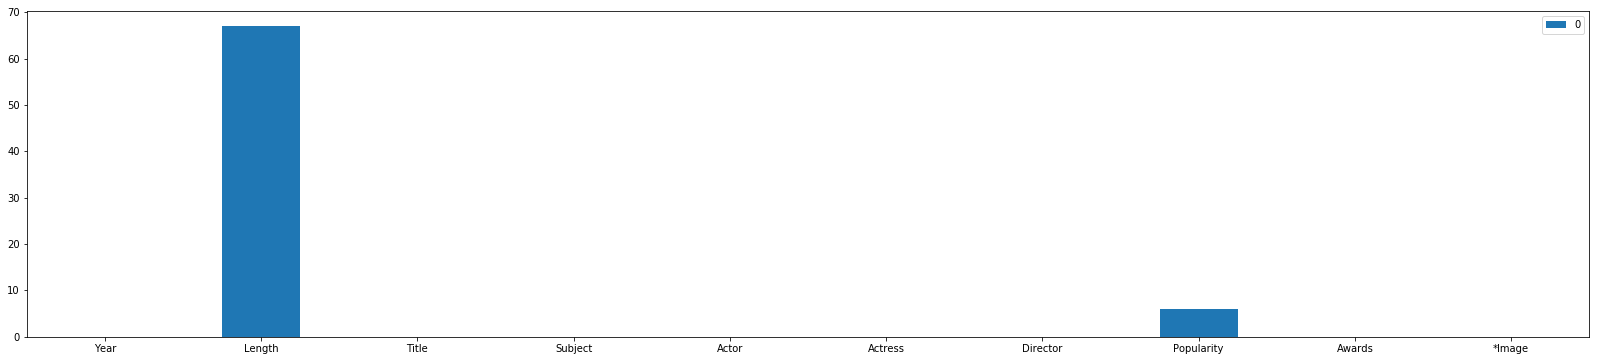

In [0]:
dataEmpty = df.isnull().sum().to_frame()
dataEmpty.plot.bar(rot=0, width=0.5, figsize=(28, 6))

2. **Indicador:** Este gráfico muestra los 10 mejores subjects con mas popularidad


In [0]:
topTenSubject = df[['Subject', 'Popularity']].groupby(['Subject']).mean().nlargest(10, 'Popularity')
topTenSubject

,Popularity
Subject,
nan,75.000000
Crime,66.000000
Adventure,63.500000
Romance,62.000000
Short,62.000000
Fantasy,57.000000
Horror,46.526316
Music,46.139535
Western,44.271186


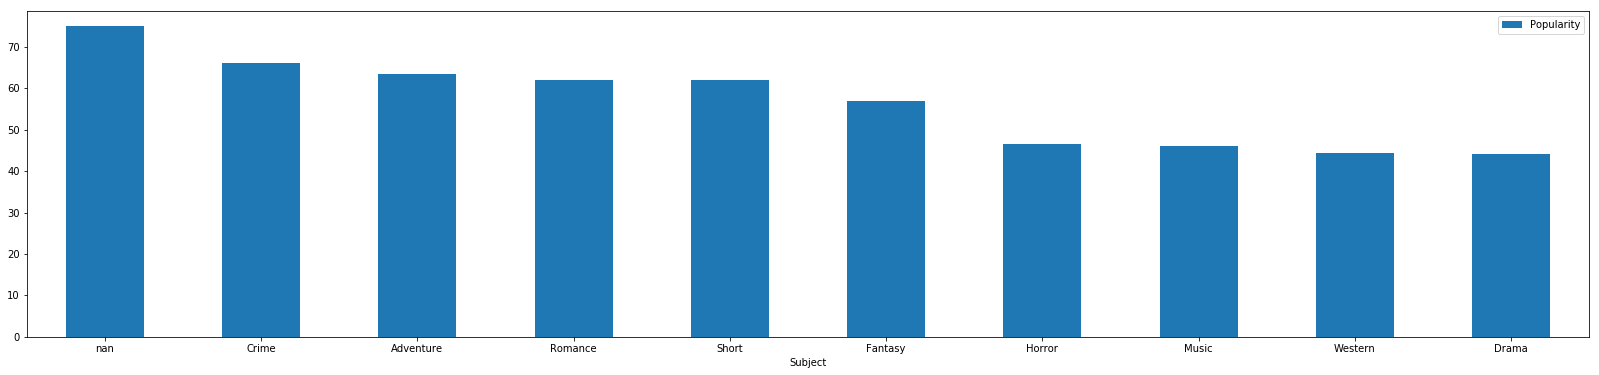

In [0]:
topTenSubject.plot.bar(y='Popularity', rot=0, width=0.5, figsize=(28, 6))

3. **Indicador:** Este gráfico muestra los 10 actores con mas peliculas hasta el momento

In [0]:
mostValuableActors = df.Actor.value_counts().to_frame().nlargest(10, 'Actor')
mostValuableActors

,Actor
"Wayne, John",81
"Eastwood, Clint",31
"Connery, Sean",30
"Newman, Paul",27
"Lancaster, Burt",24
"Tracy, Spencer",24
"Brando, Marlon",24
"Ford, Glenn",23
"Sellers, Peter",23
"Depardieu, Gérard",18


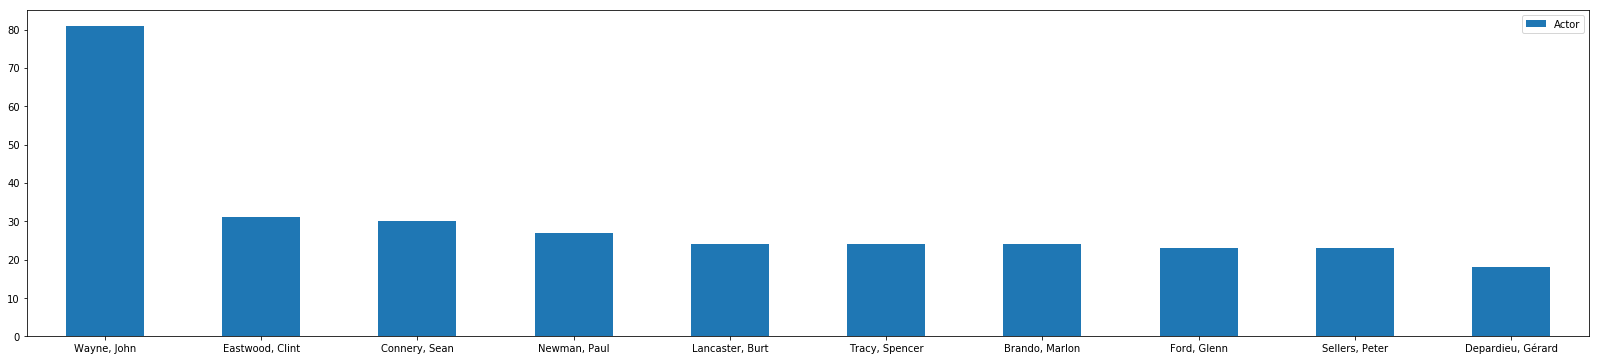

In [0]:
mostValuableActors.plot.bar(y='Actor', rot=0, width=0.5, figsize=(28, 6))